# Tutorial: Deterministic Hyperbolic Graph (DHG) Generator

This tutorial showcases the basic usage of the `dhg_generator`, a function that constructs a graph from the Deterministic Hyperbolic Graph (DHG) model. This graph is a *typical* realisation of a Random Hyperbolic Graph (RHG). Details are presented in the paper *Deterministic Construction of Typical Networks in Network Models*.

In [ ]:
from dhg import dhg_generator
import numpy as np
import matplotlib.pyplot as plt

The cell below generates a DHG with $n=1000$ nodes, average degree $\bar{k}=10$, exponent $\gamma=2.85$ of the degree distribution and inverse temperature $\beta=2.5$. The `dhg_generator` returns $A$ the adjacency matrix (in `scipy.sparse.coo_matrix` format) and a tuple of the hidden variables encoding expected degree $\kappa_i$, angular coordinate $x_i\in[0,n)$, as well as the chemical potential $\mu$. These values can be used to compute further properties of the graph, e.g., its energy.

In [ ]:
A, (kappa, x, mu) = dhg_generator(
    n=1000,      # number of nodes
    kbar=10,     # average degree
    gamma=2.85,  # power law exponent of the degree distribution
    beta=2.5     # inverse temperature
)

You can use the same function to create Random Hyperbolic Graphs (RHG) by setting `coordinate_placement` and `edge_placement` to `random` and providing a `seed`, as demonstrated below. Here, we also set the value of the chemical potential to be the one in the thermodynamic limit using the argument `chemical_potential`.

In [ ]:
A, (kappa, x, mu) = dhg_generator(
    n=1000,      # number of nodes
    kbar=10,     # average degree
    gamma=2.85,  # power law exponent of the degree distribution
    beta=2.5,    # inverse temperature
    seed=1729,   # seeding of random number generators
    coordinate_placement='random',      # random placement of coordinates
    edge_placement='random',            # random placement of edges
    chemical_potential='thermodynamic'  # chemical potential in the thermodynamic limit
)

Sometimes it is useful to use a finite size cut-off in the degree distribution. This can be achieved by setting `finite_size_cutoff` to a number other than `np.inf`. The code below creates a DHG with a finite size cut-off in the degree distribution.

In [ ]:
A, (kappa, x, mu) = dhg_generator(
    n=1000,                 # number of nodes
    kbar=10,                # average degree
    gamma=2.85,             # power law exponent of the degree distribution                 
    beta=2.5,               # inverse temperature
    finite_size_cutoff=1000 # finite size cut-off in the distribution of hidden variables
)

The cell below demonstrates an example application of DHGs: We are interested in studying the clustering in a typical realizations of RHGs (i.e., the DHG) and compare it to the ensemble average. We use the `dhg_generator` with different flags to generatre both the deterministic and random realizations.

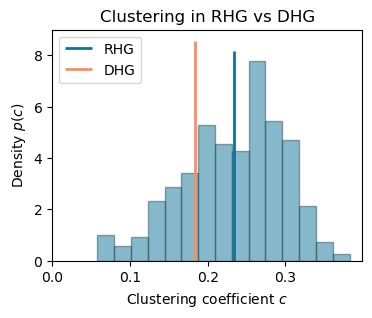

In [59]:
# Parameters
n = 1000      # number of nodes
kbar = 10     # average degree
gamma = 2.85  # power law exponent of the degree distribution
beta = 3.5    # inverse temperature
nreps = 500   # number of random realizations
seed = 1729   # random seed

def clustering(A: np.ndarray) -> float:
    """Compute the clustering coefficient of a graph with adjacency matrix A."""

    k = np.asarray(A.sum(axis=1)).flatten()
    t = np.sum((A @ A @ A).diagonal())/6.

    return 3*t/np.sum(k[k>1] * (k[k>1] - 1.)/2.)

# deterministic realization
A_det, _ = dhg_generator(n, kbar, gamma, beta)
c_det = clustering(A_det)

# random realizations
c_rand_list = []
for i in range(nreps):
    print(f'{i+1}/{nreps}', end='\r')
    A, _ = dhg_generator(n, kbar, gamma, beta, seed=seed+i, coordinate_placement='random', edge_placement='random')
    c_rand_list.append(clustering(A))

# visualize the result
fig = plt.figure(figsize=(4,3))
ax = fig.add_subplot(1,1,1)
ax.hist(c_rand_list, bins=15, density=True, color='#0e739b', edgecolor='darkslategrey', alpha=0.5)
ax.vlines(np.mean(c_rand_list), ymin=0, ymax=ax.get_ylim()[1], colors='#0e739b', linestyles='-', linewidth=2., label='RHG')
ax.vlines(c_det, ymin=0, ymax=ax.get_ylim()[1], colors='#FC8D62', linestyles='-', linewidth=2., label='DHG')
ax.set_xlim(0., None)
ax.set_xlabel(r'Clustering coefficient $c$')
ax.set_ylabel(r'Density $p(c)$')
ax.set_title('Clustering in RHG vs DHG')
ax.legend(loc='upper left');